# 05. Descreptives
In this notebook we load the data from the json-files for RF as the descriptive analysis is independent from the mdoel.

## Load json data for RF 

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [2]:
model_vars = ['model_info_transformation', 'model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (4800, 76)


0    identity_200_0_5
1    identity_200_0_5
2    identity_200_0_5
3    identity_200_0_5
4    identity_200_0_5
Name: param_model, dtype: object

# Descriptive Analysis

Boxplots per unique experimental parameter combination comparing strativied vs. unstratified: 

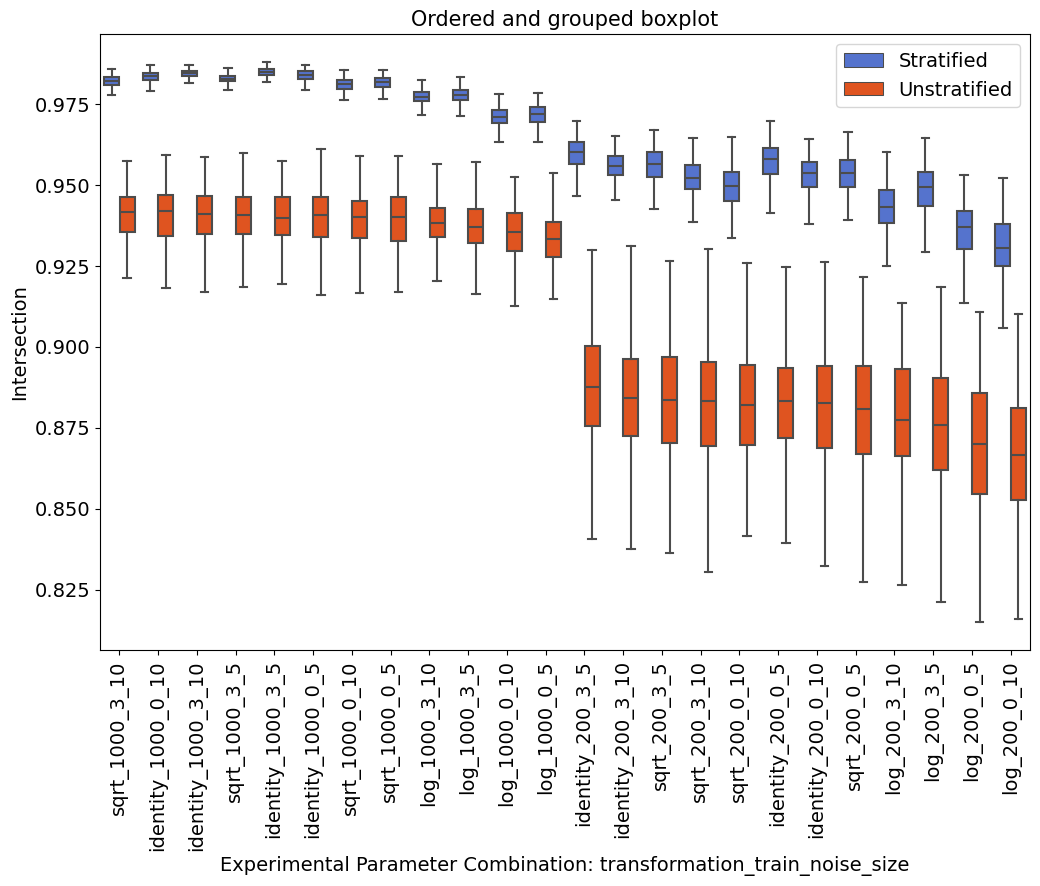

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
5                        identity_200_0_5         0.075775      -0.011865   
21                           sqrt_200_0_5         0.072926      -0.012281   
7                        identity_200_3_5         0.072798      -0.013215   
4                       identity_200_0_10         0.072670      -0.014889   
23                           sqrt_200_3_5         0.072221      -0.011109   
6                       identity_200_3_10         0.071967      -0.014395   
15                            log_200_3_5         0.071911      -0.012318   
22                          sqrt_200_3_10         0.069765      -0.014595   
20                          sqrt_200_0_10         0.067591      -0.012417   
13                            log_200_0_5         0.065605      -0.012120   
12                           log_200_0_10         0.065211      -0.010804   
14                           log_200_3_10         0.064872      -0.011612   

In [3]:
# rename colums that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})

differences_table_all = plot_eval(value_vars= ['cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_intersection_area_unstratified'] , 
          value_name = 'Intersection', 
          data = data, model_vars_title = '_'.join(model_vars_title), transformation = 'None', model = 'None', figsize = (12, 8))

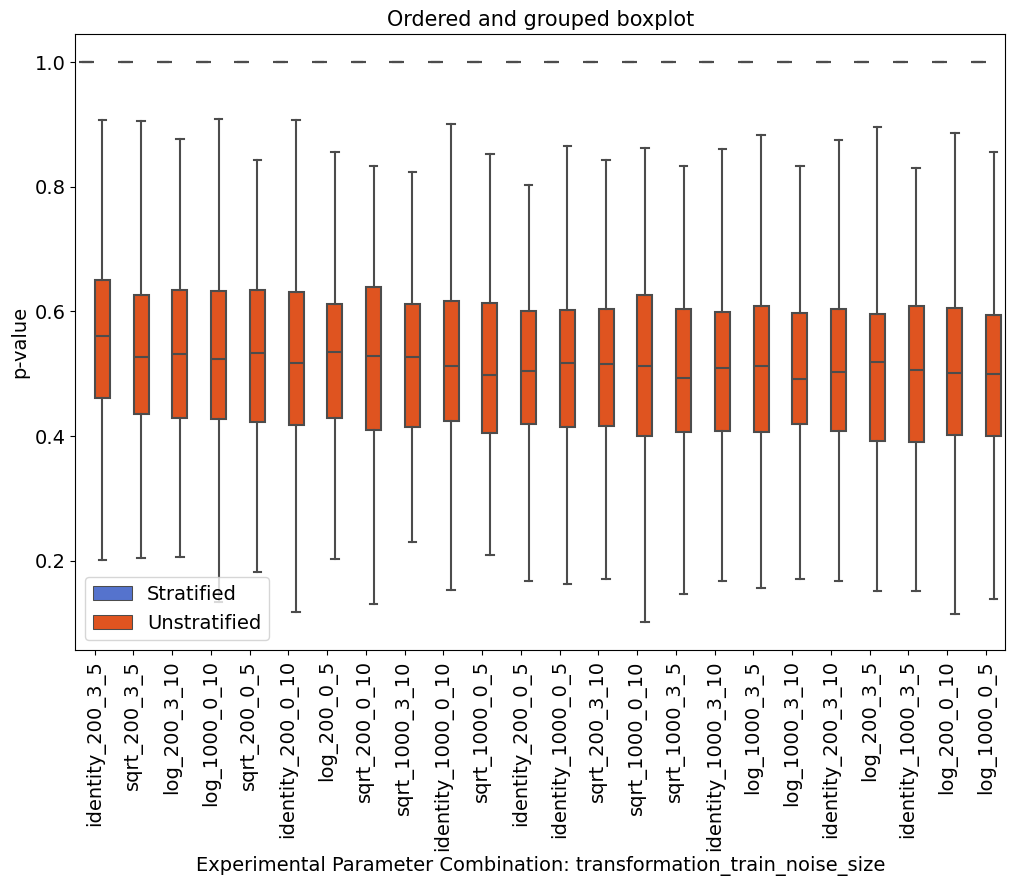

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
9                            log_1000_0_5         0.502754      -0.142622   
12                           log_200_0_10         0.498571      -0.146730   
3                       identity_1000_3_5         0.495521      -0.147798   
15                            log_200_3_5         0.494704      -0.147933   
6                       identity_200_3_10         0.493819      -0.140076   
10                          log_1000_3_10         0.492997      -0.147874   
11                           log_1000_3_5         0.492704      -0.143864   
2                      identity_1000_3_10         0.492609      -0.139501   
19                          sqrt_1000_3_5         0.492099      -0.144273   
16                         sqrt_1000_0_10         0.490146      -0.151370   
22                          sqrt_200_3_10         0.490058      -0.143815   
1                       identity_1000_0_5         0.489923      -0.147574   

In [4]:
# rename colums that startified and unstratified is written at the end
#data = data.rename(columns={'cv_folds_descriptives_stratified_p_value': 'variable_stratified', 'cv_folds_descriptives_stratified_p_value': 'variable_unstratified'})
data['variable_stratified'] = data['cv_folds_descriptives_stratified_p_value']
data['variable_unstratified'] = data['cv_folds_descriptives_unstratified_p_value']

differences_table_all = plot_eval(value_vars= ['variable_stratified', 'variable_unstratified'] , 
          value_name = 'p-value', 
          data = data, model_vars_title = '_'.join(model_vars_title), transformation = 'None', model = 'None', figsize = (12, 8))

### Old Plots

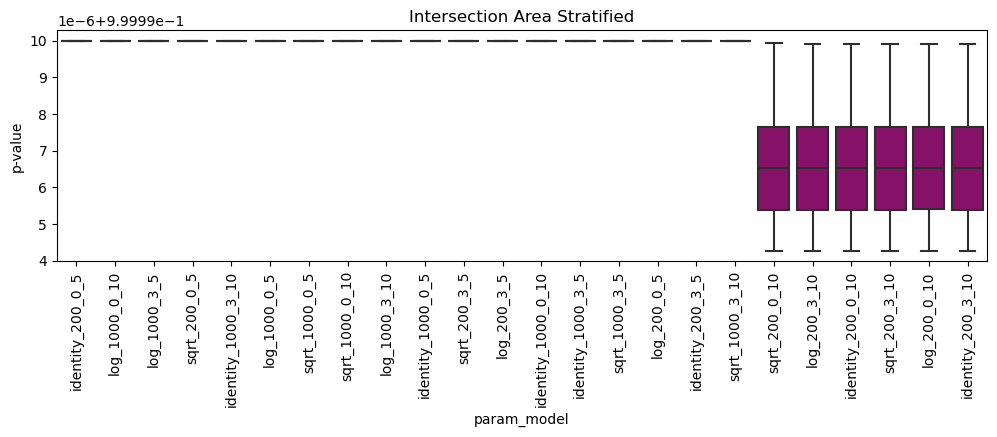

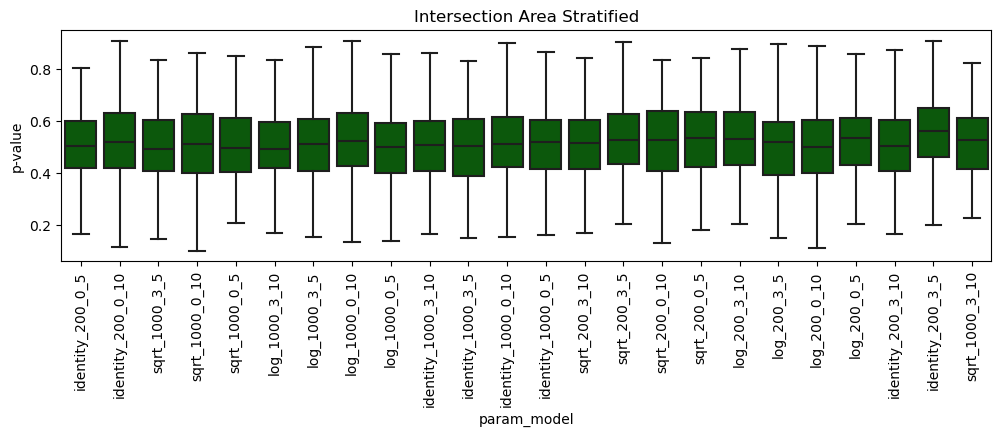

In [5]:
# make boxplot
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
sns.boxplot(x='param_model', y='cv_folds_descriptives_stratified_p_value', data= data.sort_values(by= 'cv_folds_descriptives_stratified_p_value', ascending=False),  showfliers=False, color='#990073')
plt.xticks(rotation=90)
plt.title('Intersection Area Stratified')
plt.ylabel('p-value')
plt.show()

# make boxplot
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
sns.boxplot(x='param_model', y= 'cv_folds_descriptives_unstratified_p_value', data=data.sort_values(by= 'cv_folds_descriptives_unstratified_p_value', ascending=False), showfliers=False, color='darkgreen', order=data['param_model'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Intersection Area Stratified')
plt.ylabel('p-value')
plt.show()

In [39]:
import scipy.stats as stats 
results = []
pram_model_unique = data['param_model'].unique()

for model in pram_model_unique:
    data_filtered = data[data["param_model"].str.contains(model)]
    pvalue = stats.ttest_rel(data_filtered['cv_folds_descriptives_intersection_area_stratified'], data_filtered['cv_folds_descriptives_intersection_area_unstratified']).pvalue
    print(model, pvalue)
    results.append(pvalue)

identity_200_0_5 1.5774461695215228e-128
identity_200_0_10 1.4490628020358638e-117
identity_200_3_5 1.5332520766298537e-126
identity_200_3_10 1.4419489739345017e-121
log_200_0_5 4.606528436023974e-113
log_200_0_10 7.303048766918038e-108
log_200_3_5 4.610592158040438e-121
log_200_3_10 3.279099091434022e-108
sqrt_200_0_5 2.4805714859185515e-126
sqrt_200_0_10 1.2187657041932357e-113
sqrt_200_3_5 5.526414698809411e-129
sqrt_200_3_10 1.0301831517013893e-113
identity_1000_0_5 6.299389412062441e-139
identity_1000_0_10 2.1690987536954348e-142
identity_1000_3_5 2.143412123967272e-148
identity_1000_3_10 3.654114864680203e-144
log_1000_0_5 1.2752314673130638e-140
log_1000_0_10 1.826198807058727e-129
log_1000_3_5 1.3959752041050056e-137
log_1000_3_10 3.9070319294965123e-138
sqrt_1000_0_5 2.1161724280039895e-136
sqrt_1000_0_10 8.75412147425779e-139
sqrt_1000_3_5 2.7043343502529446e-138
sqrt_1000_3_10 5.17704084209903e-145


In [42]:
max(results)

7.303048766918038e-108

In [6]:
'''
differences_table_all = pd.DataFrame()
# rename colums that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})


# make data long
data_error_long = data.melt(id_vars=['param_model'], 
                                                value_vars=['cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_intersection_area_unstratified'], 
                                                var_name='Stratification', value_name='Intersection')

# definer ordering of boxplots
filtered_data = data_error_long[data_error_long['Stratification'] == 'cv_folds_descriptives_intersection_area_unstratified']
mean_intersection = filtered_data.groupby(['param_model'])['Intersection'].mean().reset_index().sort_values(by='Intersection', ascending=False)

### Deacreptives
descriptives = data_error_long.groupby(['param_model', 'Stratification']).describe()
keys = descriptives['Intersection']['mean'].keys()
 # descriptives['Intesection']['count'].values  # check N per boxplot
descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                           'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                           'Mean': descriptives['Intersection']['mean'].values, 
                                           'SD': descriptives['Intersection']['std'].values})
difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                           'Difference Mean': difference_mean, 
                                           'Difference SD': difference_sd})
differences_table_all = pd.concat([differences_table_all, differences])


### Plot
plt.figure(figsize=(30, 6))  # Set the figure size to 10 inches by 6 inches
plt.title('Boxplot of Instersection Area: ')
sns.boxplot(x= data_error_long['param_model'], 
                    y= data_error_long['Intersection'], 
                    hue= data_error_long['Stratification'],  palette={'cv_folds_descriptives_intersection_area_stratified': '#990073', 
                     'cv_folds_descriptives_intersection_area_unstratified': 'darkgreen'}, 
                    showfliers=True, # hide outliers
                    order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
plt.xticks(rotation=90)  # rotate x labels by 90 degrees
legend = plt.legend()
for i, label in enumerate(legend.get_texts()):
        if label.get_text() == 'cv_folds_descriptives_intersection_area_stratified':
                label.set_text('Stratified')
        elif label.get_text() == 'cv_folds_descriptives_intersection_area_unstratified':
                label.set_text('Unstratified')
plt.show()

differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
differences





models = data['model_info_model'].unique()
differences_table_all = pd.DataFrame()

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_p_value': 'cv_folds_descriptives_p_value_stratified', 'cv_folds_descriptives_unstratified_p_value': 'cv_folds_descriptives_p_value_unstratified'})

for model in models: 
        data_error = data[data['model_info_model'] == model]
        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['cv_folds_descriptives_p_value_stratified', 'cv_folds_descriptives_p_value_unstratified'], 
                                                var_name='Stratification', value_name='Intesection')
        data_error_long.groupby(['param_model', 'Stratification'], as_index=False)
        data_error_long.sort_values(['param_model'])  
        
        ### Plot
        plt.figure(figsize=(15, 6))  # Set the figure size to 10 inches by 6 inches
        plt.title('Boxplot of Instersection Area: ' + model)
        sns.boxplot(x=data_error_long['param_model'], 
                    y=data_error_long['Intesection'], 
                    hue=data_error_long['Stratification'],  palette={'cv_folds_descriptives_p_value_stratified': '#990073', 
                     'cv_folds_descriptives_p_value_unstratified': 'darkgreen'}, 
                    showfliers=False,  )  # hide outliers
        legend = plt.legend()
        for i, label in enumerate(legend.get_texts()):
                if label.get_text() == 'cv_folds_descriptives_p_value_stratified':
                        label.set_text('Stratified')
                elif label.get_text() == 'cv_folds_descriptives_p_value_unstratified':
                        label.set_text('Unstratified')


        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.show()

'''


"\ndifferences_table_all = pd.DataFrame()\n# rename colums that startified and unstratified is written at the end\ndata = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})\n\n\n# make data long\ndata_error_long = data.melt(id_vars=['param_model'], \n                                                value_vars=['cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_intersection_area_unstratified'], \n                                                var_name='Stratification', value_name='Intersection')\n\n# definer ordering of boxplots\nfiltered_data = data_error_long[data_error_long['Stratification'] == 'cv_folds_descriptives_intersection_area_unstratified']\nmean_intersection = filtered_data.groupby(['param_model'])['Intersection'].mean().reset_index().sort_values(by='Intersecti